In [1]:
# Use Braket SDK Cost Tracking to estimate the cost to run this example
from braket.tracking import Tracker
t = Tracker().start()

In [2]:
import pennylane as qml
from pennylane import numpy as np

In [3]:
wires = 2  # Number of qubits

dev = qml.device("braket.local.qubit", wires=wires)

In [6]:
@qml.qnode(dev)
def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(1))

In [7]:
params = np.array([0.1, 0.2], requires_grad=True)



In [8]:
print("Expectation value of circuit:", circuit(params))



Expectation value of circuit: 0.9751703272018161


In [11]:
print("Drawing of circuit:\n")
print(qml.draw(circuit)(params))



Drawing of circuit:

0: ──RX(0.10)─╭●─┤     
1: ──RY(0.20)─╰X─┤  <Z>


In [12]:
dcircuit = qml.grad(circuit)

dcircuit(params)

array([-0.0978434 , -0.19767681])

# Training

In [14]:
opt = qml.GradientDescentOptimizer(stepsize=0.2)

In [15]:
iterations = 50

costs = []

for i in range(iterations):
    params, cost = opt.step_and_cost(circuit, params)
    costs.append(cost)





In [16]:
# Visualize results
import matplotlib.pyplot as plt    
costs.append(circuit(params))
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")

print("Minimized circuit output:", circuit(params))
print("Optimized parameters:", params)

Minimized circuit output: -0.9999996577749632
Optimized parameters: [4.19618503e-04 3.14087965e+00]


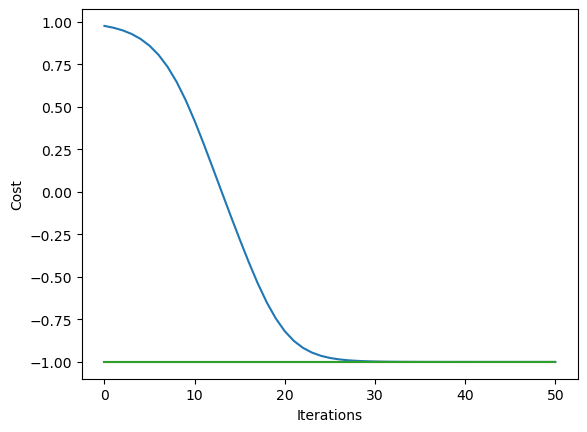

In [19]:
plt.show()

In [21]:
device_arn = "arn:aws:braket:::device/quantum-simulator/amazon/sv1"


dev = qml.device('braket.aws.qubit', device_arn=device_arn, wires=2)



In [22]:
@qml.qnode(dev)
def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(1))


dcircuit = qml.grad(circuit)

print("Result of circuit run on SV1:", circuit(params))
print("Result of gradient calculation on SV1:", dcircuit(params))


Result of circuit run on SV1: -1.0
Result of gradient calculation on SV1: [ 5.98899655e-09 -1.01762924e-08]


In [23]:

print("Task Summary")
print(t.quantum_tasks_statistics())
print('Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).')
print(f"Estimated cost to run this example: {t.qpu_tasks_cost() + t.simulator_tasks_cost():.3f} USD")

Task Summary
{'arn:aws:braket:::device/quantum-simulator/amazon/sv1': {'shots': 0, 'tasks': {'COMPLETED': 2}, 'execution_duration': datetime.timedelta(microseconds=10000), 'billed_execution_duration': datetime.timedelta(seconds=6)}}
Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).
Estimated cost to run this example: 0.008 USD
